In [1]:
### import required modules
import pandas as pd
import json
from craigslist import CraigslistHousing

### craigslist hosuing data
cl_h = CraigslistHousing(site='albany', category='apa',
                         filters={'max_price': 1500, 'private_room': True})

data = []

for i in range(10):
    for result in cl_h.get_results(sort_by='newest', geotagged=True, limit = 100):
        data.append(result)
### just stop the kernel if it takes long time , untill then we might have got enough data to build the model.
### ignore the error as it is a keyboard interrupt , so its not an error in general   
#print(len(data))

In [2]:
### save data to a file or use the data directly scarpped
print(data[:5])
f = open('craig_list_data.txt', 'w')
f.writelines('%s'%(data))
print(type(data))
df = pd.DataFrame(data)
print(df.info())
print(df.head(50))

[{'id': '6888051188', 'repost_of': '4058440173', 'name': 'Luxury 1 Bedroom plus Office By Frear Park in Troy', 'url': 'https://albany.craigslist.org/apa/d/troy-luxury-1-bedroom-plus-office-by/6888051188.html', 'datetime': '2019-05-16 19:58', 'price': '$1050', 'where': '112 Oakwood Ave. Troy NY', 'has_image': True, 'has_map': True, 'geotag': (42.744958, -73.675689), 'bedrooms': '2', 'area': '850ft2'}, {'id': '6890653387', 'repost_of': None, 'name': 'Two bed One bath in town, available now!', 'url': 'https://albany.craigslist.org/apa/d/cohoes-two-bed-one-bath-in-town/6890653387.html', 'datetime': '2019-05-16 19:53', 'price': '$1119', 'where': 'cohoes', 'has_image': True, 'has_map': True, 'geotag': (42.7754, -73.7124), 'bedrooms': '2', 'area': '1200ft2'}, {'id': '6873954781', 'repost_of': '6735356082', 'name': '1 Bedroom Furnished Apt - Includes All Utilities & Internet', 'url': 'https://albany.craigslist.org/apa/d/albany-1-bedroom-furnished-apt-includes/6873954781.html', 'datetime': '201

In [3]:
### convert text to string and replace none with albany

df['where'] = df['where'].astype(str)
df['where'] = df['where'].replace('None' , 'Albany')
df['geotag'] = df['geotag'].fillna(0)

df.head(10)

,area,bedrooms,datetime,geotag,has_image,has_map,id,name,price,repost_of,url,where
0,850ft2,2,2019-05-16 19:58,"(42.744958, -73.675689)",True,True,6888051188,Luxury 1 Bedroom plus Office By Frear Park in ...,$1050,4058440173,https://albany.craigslist.org/apa/d/troy-luxur...,112 Oakwood Ave. Troy NY
1,1200ft2,2,2019-05-16 19:53,"(42.7754, -73.7124)",True,True,6890653387,"Two bed One bath in town, available now!",$1119,None,https://albany.craigslist.org/apa/d/cohoes-two...,cohoes
2,500ft2,1,2019-05-16 19:52,"(42.656, -73.7964)",True,True,6873954781,1 Bedroom Furnished Apt - Includes All Utiliti...,$850,6735356082,https://albany.craigslist.org/apa/d/albany-1-b...,"Albany, NY - Near Albany Med. Ctr. & St. Peter..."
3,800ft2,None,2019-05-16 19:43,"(42.7003, -73.8575)",True,True,6887205758,Historic Brownstone apartment for rent- 6/1/19...,$895,6133426944,https://albany.craigslist.org/apa/d/albany-his...,302 Washington Ave
4,800ft2,None,2019-05-16 19:43,"(42.658877, -73.767863)",True,True,6887200305,large and spacious custom studio apt. (Albany,$925,5069823454,https://albany.craigslist.org/apa/d/albany-lar...,Sprague at Western
5,800ft2,None,2019-05-16 19:43,"(42.658877, -73.767863)",True,True,6887197026,large and spacious custom studio apt. (Albany,$925,5069823454,https://albany.craigslist.org/apa/d/albany-lar...,Sprague at Western
6,738ft2,1,2019-05-16 19:36,"(42.6485, -73.8711)",True,True,6873165273,"High-speed Internet Available, Programmable Th...",$1083,None,https://albany.craigslist.org/apa/d/slingerlan...,Albany
7,1278ft2,2,2019-05-16 19:33,"(42.703439, -73.849497)",True,True,6890640789,"Private, clean and quiet condo. Available NOW",$1500,6834807420,https://albany.craigslist.org/apa/d/albany-pri...,Albany
8,None,3,2019-05-16 19:30,"(42.7823, -73.9448)",True,True,6890639063,Apt for Rent 3bdr/1bth,$1050,5616106542,https://albany.craigslist.org/apa/d/schenectad...,Schenectady
9,None,3,2019-05-16 19:27,"(42.7003, -73.8575)",False,True,6890637004,GREAT LOCATION NEAR SUNY & ST.ROSE,$1400,None,https://albany.craigslist.org/apa/d/albany-gre...,Albany


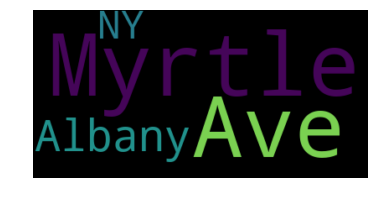

In [5]:
### worldcloud to see where these listings are mostly located
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


for i in df['where']:
    text = i

    
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

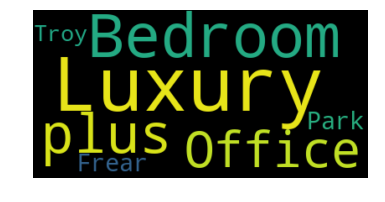

In [6]:
### worldcloud to see what the listings look like
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



names = df['name'][0]

wordcloud = WordCloud().generate(names)
    


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

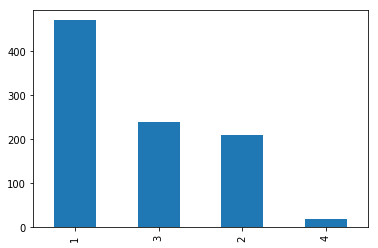

In [7]:
df['bedrooms'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Price vs Square Feet')

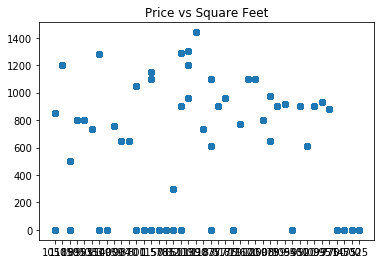

In [8]:
df['price'] = df['price'].str.replace('$', '')
df['area'] = df['area'].str.replace('ft2','')
df['area'] = df['area'].fillna(0)
df['area'] = df['area'].astype(float)

plt.scatter(df.price,df.area)
plt.title("Price vs Square Feet")


In [9]:
df['price'].describe()

count     1000
unique      42
top       1150
freq       280
Name: price, dtype: object

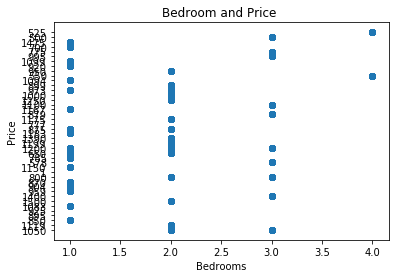

In [11]:
df['bedrooms'] = df['bedrooms'].astype(float)
plt.scatter(df.bedrooms,df.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


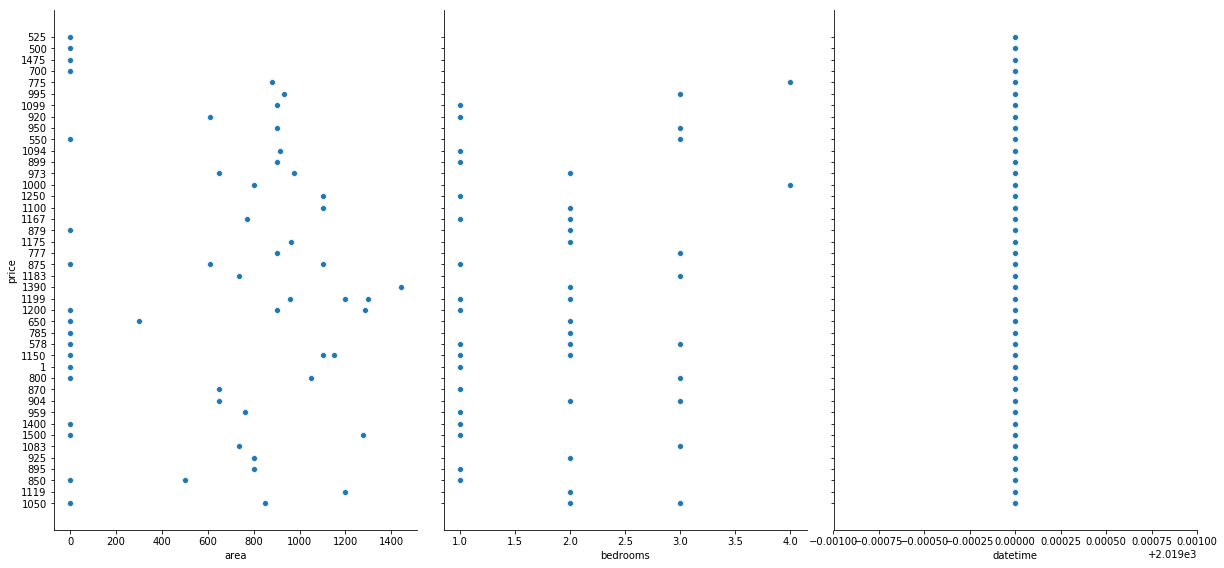

,area,bedrooms,name,price,datetime,where
0,850.0,2.0,Luxury 1 Bedroom plus Office By Frear Park in ...,1050,2019,112 Oakwood Ave. Troy NY
1,1200.0,2.0,"Two bed One bath in town, available now!",1119,2019,cohoes
2,500.0,1.0,1 Bedroom Furnished Apt - Includes All Utiliti...,850,2019,"Albany, NY - Near Albany Med. Ctr. & St. Peter..."
3,800.0,NaN,Historic Brownstone apartment for rent- 6/1/19...,895,2019,302 Washington Ave
4,800.0,NaN,large and spacious custom studio apt. (Albany,925,2019,Sprague at Western
5,800.0,NaN,large and spacious custom studio apt. (Albany,925,2019,Sprague at Western
6,738.0,1.0,"High-speed Internet Available, Programmable Th...",1083,2019,Albany
7,1278.0,2.0,"Private, clean and quiet condo. Available NOW",1500,2019,Albany
8,0.0,3.0,Apt for Rent 3bdr/1bth,1050,2019,Schenectady
9,0.0,3.0,GREAT LOCATION NEAR SUNY & ST.ROSE,1400,2019,Albany


In [12]:
### convert dattime to year , remove $ symbol in price , ft in area 

import seaborn as sns
import matplotlib.pyplot as plt

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['datetime'] = df['datetime'].dt.year

# df['area'] = df['area'].dropna()
# df['bedrooms'] = df['bedrooms'].dropna()

df2 = df[['area','bedrooms','name','price','datetime','where']]
sns.pairplot(df2,x_vars= ['area','bedrooms','datetime'], y_vars = 'price', size = 8, aspect = 0.7)
plt.show()
df2.head(900)

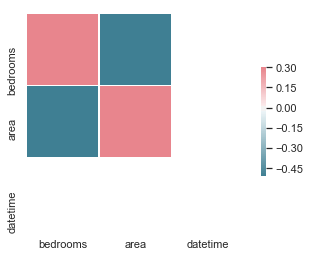

In [13]:
### find correlation between input features
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
sns.set(style="white")
data1 = df[['bedrooms','area','datetime','price']]
cor = data1.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(cor, dtype=np.bool)
sns.heatmap(cor, mask = mask ,cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plot correlation matrix

# datetime — when the listing was posted.
# geotag — the coordinate location of the listing.
# has_image — whether there’s an image in the Craigslist posting.
# has_map — whether there’s a map associated with the listing.
# id — the unique Craigslist id for the listing.
# name — the name of the listing that shows up on Craigslist.
# price — the monthly rent.
# url — the URL to view the full listing.
# where — what the person who created the listing put in for where it is.

In [14]:
### choose input features as x and lables as y , fillna as 0 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as sm
import numpy as np
import sys
from sklearn.preprocessing import Imputer


data = df[['bedrooms','area','datetime']]
mean = data['area'].mean(skipna = True)
data['area'] = data['area'].mask(data.area==0,mean)


imp = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imp.fit(data)
X = imp.transform(data)
X



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[2.0000e+00, 8.5000e+02, 2.0190e+03],
       [2.0000e+00, 1.2000e+03, 2.0190e+03],
       [1.0000e+00, 5.0000e+02, 2.0190e+03],
       ...,
       [1.0000e+00, 6.3886e+02, 2.0190e+03],
       [3.0000e+00, 6.3886e+02, 2.0190e+03],
       [4.0000e+00, 6.3886e+02, 2.0190e+03]])

In [15]:
### text preprocessing in where column like removing special chars , emoticons, , html tags

import re
def process(text):
    text = re.sub('<[^>]*>', '', text) ##remove html tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) ### remove emoticons 
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '+' '.join(emoticons).replace('_', ''))
    return text




In [16]:

### convert text data to onehot encoding as they are char data whoch cant be fit in to build the model

#from sklearn.preprocessing import OneHotEncoder

#print(X)

# X.info()
# # onehotencoder = OneHotEncoder(handle_unknown='ignore')
# # transformed = onehotencoder.fit_transform(X).toarray()
# for i in X['where']:
#     print(i)
#     process(i)


# X['where'] = X['where'].apply(lambda x: process(x))
# X['where'].value_counts()

# onehotencoder = OneHotEncoder()
# X['where'] = onehotencoder.fit_transform(X['where'].values.reshape(-1,1)).toarray()


# X['where']

In [17]:
### we have to predict price based on input features X

y = df2['price']

X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.9,random_state = 32)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)



[[1.00000000e+00 6.38860000e+02 2.01900000e+03]
 [3.00000000e+00 6.38860000e+02 2.01900000e+03]
 [2.00000000e+00 1.10000000e+03 2.01900000e+03]
 [1.00000000e+00 1.10000000e+03 2.01900000e+03]
 [1.00000000e+00 1.15000000e+03 2.01900000e+03]
 [1.00000000e+00 1.10000000e+03 2.01900000e+03]
 [1.00000000e+00 1.10000000e+03 2.01900000e+03]
 [3.00000000e+00 6.38860000e+02 2.01900000e+03]
 [1.00000000e+00 6.38860000e+02 2.01900000e+03]
 [1.00000000e+00 7.70000000e+02 2.01900000e+03]
 [2.00000000e+00 1.10000000e+03 2.01900000e+03]
 [1.00000000e+00 9.00000000e+02 2.01900000e+03]
 [1.00000000e+00 9.00000000e+02 2.01900000e+03]
 [1.00000000e+00 5.00000000e+02 2.01900000e+03]
 [3.00000000e+00 9.33000000e+02 2.01900000e+03]
 [1.00000000e+00 6.10000000e+02 2.01900000e+03]
 [3.00000000e+00 6.38860000e+02 2.01900000e+03]
 [3.00000000e+00 9.33000000e+02 2.01900000e+03]
 [3.00000000e+00 1.05000000e+03 2.01900000e+03]
 [2.00000000e+00 6.38860000e+02 2.01900000e+03]
 [3.00000000e+00 6.38860000e+02 2.019000

In [18]:
print (linreg.coef_ , '\n')
print(linreg.score(X_test,y_test))


[32.66700839  0.26605563  0.        ] 

0.08484645529512225


In [19]:
### fot the linear_reg ordinary least sqaure model and see the coefficients


linear_model = sm.OLS(y.astype(float), X.astype(float))
results = linear_model.fit()
print(results.summary())
print(linreg.intercept_)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     49.51
Date:                Thu, 16 May 2019   Prob (F-statistic):           3.15e-21
Time:                        20:15:58   Log-Likelihood:                -6978.9
No. Observations:                1000   AIC:                         1.396e+04
Df Residuals:                     997   BIC:                         1.398e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            43.9419     10.101      4.350      0.0

In [20]:
### using lasso regression model
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
lasso = linear_model.Lasso()
params = {'alpha':[0.001, 0.024, 0.025, 0.026, 0.04]}
lasso_clf = GridSearchCV(estimator=lasso, param_grid= params,cv = 100)
lasso_clf.fit(X,y)
lasso_clf.score(X_test,y_test)


0.09333743456756427

In [21]:
#### predict the prices
from sklearn import metrics
y_pred = lasso_clf.predict(X_test)
print(y_pred[:20])

print('\n',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[1034.38073785 1086.85059519 1034.38073785 1116.7481775  1034.38073785
 1116.7481775  1116.7481775  1042.91018265  895.23419295 1078.32115039
 1086.85059519  946.49991278 1116.7481775  1108.63280367 1034.38073785
  990.44032531 1116.7481775   946.49991278 1116.7481775  1049.93159777]

 263.7966292466898


In [22]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [23]:
clf.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
clf.score(X_test,y_test)


0.37918292911965223

In [25]:
y_pred1 = clf.predict(X_test)
np.set_printoptions(suppress=True)

y_pred1[:10]


array([1262.5000028 ,  911.75003153, 1262.5000028 , 1150.00000571,
       1262.5000028 , 1150.00000571, 1150.00000571, 1124.24999344,
        850.00000478,  537.50000541])

In [26]:
print('\n',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


 218.28717715269423


In [27]:
##support vector regression
from sklearn.svm import SVR
 


model = SVR(kernel='linear')
model.fit(X_train, y_train)

print (model.score(X_test, y_test))

0.05242820565612272


In [28]:
y_pred2 = model.predict(X_test)
np.set_printoptions(suppress=True)

y_pred2[:10]

array([ 934.62494416, 1056.96600087,  934.62494416, 1150.70851064,
        934.62494416, 1150.70851064, 1150.70851064, 1057.15749023,
        870.05544942,  934.43345479])

In [29]:
print('\n',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))


 269.682311500627


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot
   
params = {'max_depth':range(1, 10)}
gscv = GridSearchCV(DecisionTreeRegressor(random_state=1), params) #, scoring=scorer)
gscv.fit(X_train, y_train)
dtr_model = gscv.best_estimator_
dtr_model.score(X_test, y_test)
    

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.40002483229435937

In [31]:
y_pred3 = dtr_model.predict(X_test)
y_pred3[:20]

array([1262.5 ,  911.75, 1262.5 , 1150.  , 1262.5 , 1150.  , 1150.  ,
       1124.25,  850.  ,  537.5 ,  911.75,  775.  , 1150.  , 1175.  ,
       1262.5 , 1125.  , 1150.  ,  775.  , 1150.  , 1000.  ])

In [32]:
print('\n',np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))


 214.59175787130383
